En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
-Normalidad (ya la deberíais haber evaluado)
-Homogeneidad de varianzas
-Independencia de las variables
Cada asunción la deberéis testar de forma visual y analítica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0


Hacemos el histplot para ver de forma gráfica la asunción de normalidad.

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Count'>

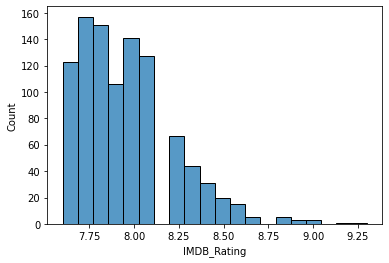

In [3]:
sns.histplot(x= df["IMDB_Rating"], bins = 20)

Hacemos el shapiro para ver la asunción de normalidad de forma analítica. Nos fijamos en pvalue y vemos que es menor de 0.05 porque está elevado a -22, por lo tanto NO es normal.

In [4]:
stats.shapiro(df["IMDB_Rating"])

ShapiroResult(statistic=0.9193028211593628, pvalue=1.1039797872915765e-22)

Ahora vamos a mirar la homogeneidad de varianzas. Vamos a hacer un boxplot de las variables categóricas para ver la relación con la variable respuesta.

In [5]:
  # Para hacer el boxplot necesitamos sacar las variables categóricas.
  df_categoricas= df.select_dtypes(exclude = np.number)
  df_categoricas.head(2)

,Certificate,Genre
0,A,Drama
1,A,Crime


<AxesSubplot:xlabel='Certificate', ylabel='IMDB_Rating'>

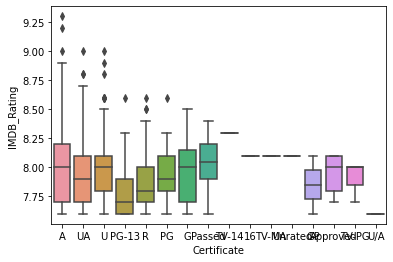

In [6]:
sns.boxplot(data=df, x= "Certificate", y="IMDB_Rating" )

Para hacer la parte analítica de la homogeneidad de varianzas vamos a utilizar es test de Levene.